In [ ]:
import msprime, tskit, pyslim, time

In [ ]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [5]:
ts = tskit.load("../../../out.trees").simplify()

In [6]:
for tree in ts.trees():
    print(f"Tree {tree.index} covers {tree.interval}")
    if tree.index >= 4:
        print("...")
        break
print(f"Tree {ts.last().index} covers {ts.last().interval}")

Tree 0 covers Interval(left=0.0, right=10000.0)
Tree 1 covers Interval(left=10000.0, right=10001.0)
Tree 2 covers Interval(left=10001.0, right=20002.0)
Tree 3 covers Interval(left=20002.0, right=20003.0)
Tree 4 covers Interval(left=20003.0, right=20004.0)
...
Tree 258 covers Interval(left=28057.0, right=30008.0)


In [7]:
import time
elapsed = time.time()
for tree in ts.trees():
    if tree.has_multiple_roots:
        print(f"Tree {tree.index} has not coalesced")
        break
else:
    elapsed = time.time() - elapsed
    print(f"All {ts.num_trees} trees coalesced")
    print(f"Checked in {elapsed:.6g} secs")

Tree 258 has not coalesced


Tree number 1, which runs from position 10000.0 to 10001.0:


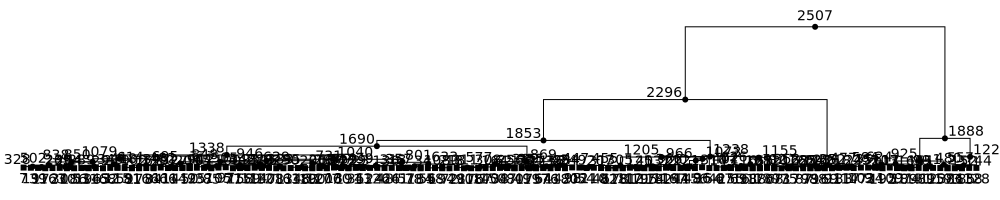

In [8]:
swept_tree = ts.at(10_000)  # or you can get e.g. the nth tree using ts.at_index(n)
intvl = swept_tree.interval
print(f"Tree number {swept_tree.index}, which runs from position {intvl.left} to {intvl.right}:")
# Draw it at a wide size, to make room for all 40 tips
swept_tree.draw_svg(size=(1000, 200))

In [10]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

Contents in csv file:     cycle  sex_ratio
0       1   0.500000
1      11   0.510000
2      21   0.516854
3      31   0.475248
4      41   0.427184
..    ...        ...
72    721   0.415842
73    731   0.500000
74    741   0.508929
75    751   0.495050
76    761   0.381818

[77 rows x 2 columns]


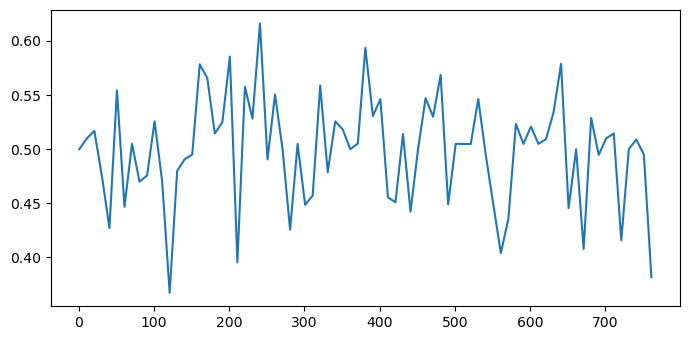

In [13]:
columns = ["cycle", "sex_ratio"]
df = pd.read_csv("../../../sim_log.txt", usecols=columns)
print("Contents in csv file:", df)
plt.plot(df.cycle, df.sex_ratio)

In [15]:
plt.show()